## DSTA Lab 5-d: Classification with Scikit-learn

This notebook is available on Colab or from the [DSTA repo (download only)](https://www.dcs.bbk.ac.uk/~ale/dsta/)

Data is imported from the [Openml.org](https://openml.org/) public repository.

### Supervised Classification with the Python Scikit-learn module

#### Slides and codes are courtesy of [Andreas C. Mueller, NYU](https://github.com/amueller/)

#### Example: Exploratory classification of a blood transfusion dataset from Sklearn

The blood transfusion dataset is imported by Scikit-learn.
Check "fetch_openml" import sttement further below.

Details about the dataset: [https://www.openml.org/d/1464](https://www.openml.org/d/1464).



#### Package Imports

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

from subprocess import check_call

import matplotlib.pyplot as plt

### Matplotlib and Sklearn Settings Configuration

In [2]:
sklearn.set_config(print_changed_only=True)
# Toggle to 'False' if you want to see the default parameters
# See example below

%matplotlib inline
# Don't spawn external windows

#### Fetch the dataset from sklearn

Package sklearn includes toy datasets for experimentation with machine learning models. One example is the blood transfusion dataset (please check the link at the top of this notebook). Below, the dataset is loaded as an sklearn object that has multiple attributes. The actual data (X, Y) are the "data" and "target" attributes of the object.

In [3]:
# Fetch the data - provided as sklearn.utils.bunch class
blood = fetch_openml('blood-transfusion-service-center')

print(f"blood Python object type: {type(blood)}")
print(f"Attributes of blood Python object: {dir(blood)}")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


blood Python object type: <class 'sklearn.utils._bunch.Bunch'>
Attributes of blood Python object: ['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


#### Check X and Y variable names and data size

In [4]:
print(f"X variable names: {blood.feature_names}")
print(f"Y variable names: {blood.target_names}")
print(f"X data size: {blood.data.shape}")

X variable names: ['V1', 'V2', 'V3', 'V4']
Y variable names: ['Class']
X data size: (748, 4)


#### Check the type of X , Y data

X is a pandas dataframe and Y is a pandas series. These are the core data structures of pandas package.

In [5]:
print(f"Type of X data: {type(blood.data)}")
print(f"Type of Y data: {type(blood.target)}")

Type of X data: <class 'pandas.core.frame.DataFrame'>
Type of Y data: <class 'pandas.core.series.Series'>


#### Print the first 5 rows of the data

In [6]:
blood.data.head()

,V1,V2,V3,V4
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,1.0,16.0,4000.0,35.0
3,2.0,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0


#### Print the first 5 values of the target variable

In [7]:
blood.target.head()

0    2
1    2
2    2
3    2
4    1
Name: Class, dtype: category
Categories (2, object): ['1', '2']

#### Check class distribution of Y

In [8]:
blood.target.value_counts()

1    570
2    178
Name: Class, dtype: int64

#### Use ``train_test_split`` to prepare your train and test data

As we see above, the class distribution is imbalanced...
Hint: Look for a "stratified" ``train_test_split``!

Package documentation: [sklearn train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    blood.data,
    blood.target,
    random_state=0
    )

#### Use ``StandardScaler`` from sklearn to standardize the predictors.

Package documentation: [sklearn StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Otherwise, once ``StandardScaler`` has been imported, use ``help(StandardScaler)`` to print its documentation. You can use ``help`` Python command to check the documentation of any function or class.

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Check class distribution in training and test Y.

Hint: The ``value_counts()`` method can help here

In [11]:
print(f"Training Y class count: \n{pd.Series(y_train).value_counts()}\n")
print(f"Test Y class count: \n{pd.Series(y_test).value_counts()}")

Training Y class count: 
1    438
2    123
Name: Class, dtype: int64

Test Y class count: 
1    132
2     55
Name: Class, dtype: int64


#### Use ``LabelEncoder`` from sklearn to encode target labels with values between 0 and n_classes-1.

Package documentation: [sklearn LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [12]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

mappings = {label: i for i, label in enumerate(label_encoder.classes_)}
print(f"Label Encoder Mapping: {mappings}")

Label Encoder Mapping: {'1': 0, '2': 1}


#### Use again the ``shape`` function to check the dimensions of training and test X.

In [13]:
print(X_train.shape)
print(X_test.shape)

(561, 4)
(187, 4)


### Classify with K-nn

#### Check ``KNeighborsClassifier`` documentation of ask for help below.

Documenation: [sklearn KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [14]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

#### Fit K-nn model

In [15]:
myclassifier = KNeighborsClassifier(n_neighbors=5)
myclassifier.fit(X_train, y_train)

KNeighborsClassifier()

#### Calculate K-nn training and test data accuracy

In [16]:
knn_train_accuracy = myclassifier.score(X_train, y_train)
knn_test_accuracy = myclassifier.score(X_test, y_test)

print(f"K-nn training data accuracy: {round(knn_train_accuracy, 3)}")
print(f"K-nn test data accuracy: {round(knn_test_accuracy, 3)}")

K-nn training data accuracy: 0.813
K-nn test data accuracy: 0.743


#### Use Grid Search and Cross Validation to find the best number of neighbors

The default option of 5 fold cross validation is used (check the documentation!).

GridSearchCV documentation: [sklearn GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [17]:
# Define parameter grid
num_neighbors = np.array([1, 3, 5, 8, 10, 15, 20, 25, 30])
param_grid = dict(n_neighbors=num_neighbors)

param_grid

{'n_neighbors': array([ 1,  3,  5,  8, 10, 15, 20, 25, 30])}

In [18]:
# Initialize model
knn_model = KNeighborsClassifier()
grid = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring="accuracy"
    )

# Run grid search
grid.fit(X_train, y_train)
best_n = grid.best_estimator_.n_neighbors
best_score = round(grid.best_score_, 3)

print(f"Best number of neighbors: {best_n}")
print(f"Best achieved test accuracy for {best_n} neighbors: {best_score}")

Best number of neighbors: 25
Best achieved test accuracy for 25 neighbors: 0.784


### Classify with Decision Trees

#### Check ``DecisionTreeClassifier`` documentation of ask for help below.

Documenation: [sklearn DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [19]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

#### Train Decision Tree Classifier

Gini index is the default split criterion. Check the documentation!

In [20]:
decision_tree = tree.DecisionTreeClassifier()
fitted_tree = decision_tree.fit(X_train, y_train)

#### Calculate Decision Tree training and test data accuracy

In [21]:
tree_train_acc = fitted_tree.score(X_train, y_train)
tree_test_acc = fitted_tree.score(X_test, y_test)

print(f"Decision Tree training data accuracy: {round(tree_train_acc, 3)}")
print(f"Decision Tree test data accuracy: {round(tree_test_acc, 3)}")

Decision Tree training data accuracy: 0.941
Decision Tree test data accuracy: 0.684


#### Plot the tree

Decision trees are great for explainability, but they suffer from high variance.


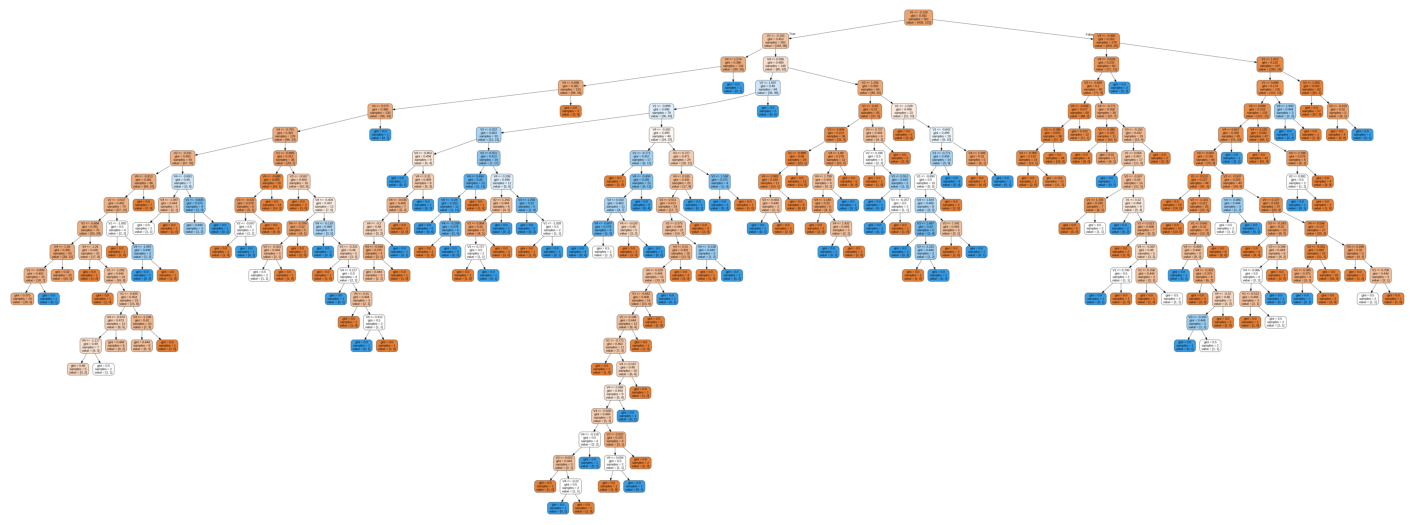

In [22]:
export_graphviz(
    fitted_tree,
    out_file='dec_tree.dot',
    feature_names=blood.feature_names,
    rounded=True,
    filled=True
    )

# convert .dot to .pngfrom subprocess import check_call
check_call(['dot','-Tpng','dec_tree.dot','-o','dec_tree.png'])

# if pydot is installed use the below
!dot -Tpng dec_tree.dot -o dec_tree.png -Gdpi-600

# Read and display the figure

plt.figure(figsize = (18, 26))
plt.imshow(plt.imread('dec_tree.png'))
plt.axis('off');
plt.show();